In [ ]:
!pip install arviz
!pip install pymc3==3.9

In [ ]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import arviz as az

# Question 1

In [99]:
df1 = pd.read_csv("data1.csv")
#no need to normalize data
X=df1['x']
y=df1['y']

In [97]:
df1.sample(3)

,x,y
40,1.00,1.0
32,0.37,1.0
17,-0.47,0.0


### Q1
Consider the attached dataset, each row is a different chemical experiment. The 𝑥 reports the normalised gas pressure in the chemical reaction and 𝑦 is a binary variable, where 1 means that the chemical reaction was successful and  0 means the chemical reaction was unsuccessful. 

Compute the posterior distribution of the predicted probability that the chemical reaction will be successful at 𝑥=0.5 (use logistic regression).

---
Select the correct posterior from the list of images  (in particular select the closest image to the one you computed, the figure title is the label used in the multiple choice question).  To generate the histograms, I used "pyplot.hist" with bins=50. This question requires a rational: paste the code you used to compute and plot the posterior. 

In [100]:
with pm.Model() as logistic_model:        
    alpha = pm.Normal('alpha', 0.0, sd=30)
    beta  = pm.Normal('beta',  0.0, sd=30)
    # complete the model

    sig = pm.Uniform('sig',.0001,30)          #ADDED
    #mu = beta * X + alpha                     #ADDED
    mu = pm.Deterministic('mu', pm.math.invlogit(alpha + pm.math.dot(X, beta)))
    pm.Normal('Like', mu, sig, observed = y)  #ADDED

In [101]:
with logistic_model:
    approx = pm.fit(60000)#ADVI method
    #sample = pm.sample(10000, tune = 3000, chains = 1)#ADDED
posterior = approx.sample(10000)

Average Loss = 7.1452: 100%|██████████| 60000/60000 [00:30<00:00, 1979.84it/s]
Finished [100%]: Average Loss = 7.1444


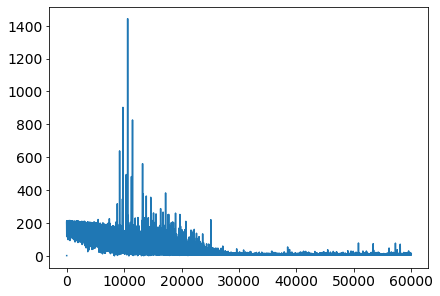

In [102]:
az.plot_dist(0.5 * posterior['beta'] + posterior['alpha'])
plt.plot(approx.hist)

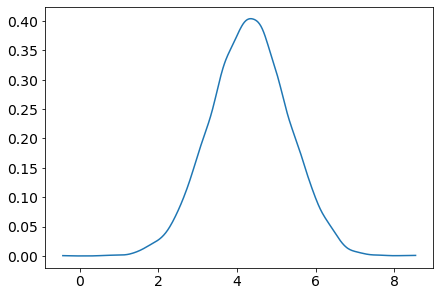

In [103]:
az.plot_dist(.5 * posterior['beta'] + posterior['alpha'])

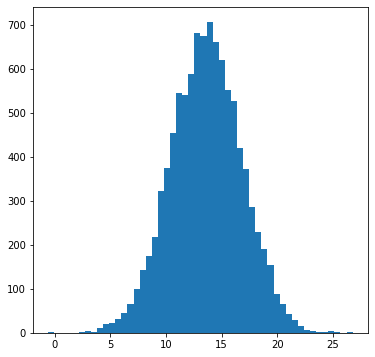

In [107]:
plt.figure(figsize=(6,6))
plt.hist(1.8 * posterior['beta'] + posterior['alpha'], bins=50)
plt.show()

In [ ]:
pm.traceplot(samples)

In [ ]:
pm.plot_posterior(posterior, color='LightSeaGreen', kind='hist', bins=50);

### Question 2
The dataset (see scatter plot) reports measurements of temperature and pressure made using two different sensors (stored in the two csv different files below). The following measurement model is assumed for dataset 1 (sensor 1): 

𝑝(𝑦𝑖|𝛼+𝛽𝑥𝑖)=𝑁(𝑦𝑖;𝛼+𝛽𝑥𝑖,𝜎1) 

for the dataset 2 (sensor 2) 

𝑝(𝑦𝑖|𝛼+𝛽𝑥𝑖)=𝑁(𝑦𝑖;𝛼+𝛽𝑥𝑖,𝜎2) 

From the above model, you can notice that the difference between the two sensors' measurements is that 𝜎1≠𝜎2, that is the standard deviation of  the noise is different. 
Your goal is to write a linear regression model that incorporates the measurements of both sensors 
at the same time and estimate the parameters 𝛼,𝛽 of the linear regression model. 

In [ ]:
df2=pd.read_csv("data2_sensor1.csv")
#no need to normalize data
x1=df2['temperature']
y1=df2['pressure']

df3=pd.read_csv("data2_sensor2.csv")
#no need to normalize data
x2=df3['temperature']
y2=df3['pressure']

In [ ]:
df2.sample(5)#['temperature']
#df2['pressure']

,temperature,pressure
32,1.273543,1.356354
25,0.658632,1.821203
18,-1.080159,2.448257
7,0.498910,1.640215
39,-0.703240,2.963604


Q2

In [ ]:
import theano.tensor as tt

def custom_dist_logp(z,sig,y1,y2):
    return pm.Bernoulli.dist(0.5*tt.erfc(-(y2-z)/sig/np.sqrt(2))).logp(1.0)+pm.Bernoulli.dist(0.5*tt.erfc((yl-z)/sig/np.sqrt(2))).logp(1.0)

In [ ]:
with pm.Model() as regression_model:        
    alpha  = pm.Normal('alpha', 0.0, sd=30) #theta=[alpha,beta]
    beta   = pm.Normal('beta', 0.0, sd=30)
    sigma1 = pm.Uniform('sigma1', 0.0001, 30)
    sigma2 = pm.Uniform('sigma2', 0.0001, 30)

    #z = beta * x1 + alpha
    #sig = pm.Deterministic('sig', sigma1 + x1 * sigma2)
    #pm.Normal('Like', z, sig, observed=y1)
   
with regression_model:
    approx = pm.fit(60000)#we can compute the posterior samples now
    
posterior = approx.sample(10000)

    #mu1=alpha+beta*ti
    #mu2=alpha+beta*tn
    #l1=pm.DensityDist('Like1',custom_dist_logp,observed=dict(mu=mu1, sigma=sigma, yl=yl, yu=yu))
    #l2=pm.Normal('Like2', mu2, sigma, observed=yn[:,0])

with mymodel:
    posterior_samples=pm.sample(5000,tune=1000,chains=1)

In [ ]:
# Bayesian Logistic regression

with pm.Model() as logistic_model:        
    alpha  = pm.Normal('alpha', 0.0, sd=30) #theta=[alpha,beta]
    beta   = pm.Normal('beta', 0.0, sd=30)
    sigma1 = pm.Uniform('sigma1', 0.0001, 30)#NOT USED
    sigma2 = pm.Uniform('sigma2', 0.0001, 30)#NOT USED

    phi = pm.Deterministic('phi', pm.math.invlogit(alpha+pm.math.dot(df2['temperature'], beta)))
    likelihood = pm.Bernoulli('likelihood', phi, observed = df2['pressure'])

Average Loss = inf: 100%|██████████| 60000/60000 [00:36<00:00, 1662.99it/s]
Finished [100%]: Average Loss = nan


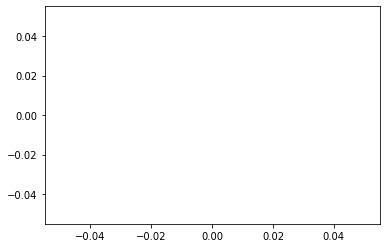

In [ ]:
with logistic_model:
    approx = pm.fit(60000) #we can compute the posterior samples now

posterior = approx.sample(10000)

In [ ]:
with logistic_model:
    posterior_samples=pm.sample(5000,tune=1000,chains=1)

Combining two scalar 

https://colab.research.google.com/drive/1eN3BjuqEQtXUEvO-FVTJuPaTsyGFgX7B#scrollTo=1Y9ESd3NCEh8 

### Question 3

In [ ]:
# D.  
y=np.array([1,1,1,1,1,1,1,1,0,0,0,0])

with pm.Model() as coin_model:
    # prior
    theta = pm.Uniform("theta", 0,1)
    #likelihood
    like = pm.Bernoulli("like", theta, observed=y)

with coin_model:   
    posterior_D = pm.sample(10000, tune=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
100%|██████████| 13000/13000 [00:05<00:00, 2480.95it/s]


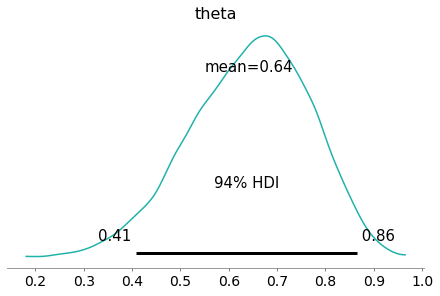

In [ ]:
pm.plot_posterior(posterior_D, color='LightSeaGreen')

In [ ]:
#C.  
y=np.array([1,1,1,1,1,1,1,1,0,0,0,0])

with pm.Model() as coin_model:
    # prior
    alpha = pm.Normal("alpha", 0,sd=30)
    beta  = pm.Normal("beta", 0, sd=30)

    mu = alpha + beta *y
    #likelihood
    like = pm.Bernoulli("like", mu, observed=y)

with coin_model:   
    posterior_C = pm.sample(10000, tune=3000)

In [ ]:
# B.
y=np.array([1,1,1,1,1,1,1,1,0,0,0,0])

with pm.Model() as coin_model:
    # prior
    theta = pm.Uniform("theta", 0,1)
    #likelihood
    like = pm.Normal("like", theta, observed=y)

with coin_model:   
    posterior_B = pm.sample(10000, tune=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
100%|██████████| 13000/13000 [00:05<00:00, 2339.75it/s]


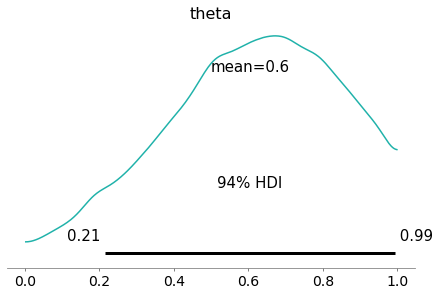

In [ ]:
pm.plot_posterior(posterior_B, color='LightSeaGreen')

Consider the density plot of the posterior of theta from the previous question (see image below). The way to answer the question "Is the coin fair?" is to compute the probability 𝑃(𝜃≥0.5) (or equivalently 𝑃(𝜃<0.5)=1−𝑃(𝜃≥0.5)). For instance, If 𝑃(𝜃≥0.5)≥0.9 then we can see that the coin is not fair with probability 0.9. 

How can you compute 𝑃(𝜃≥0.5) from the samples posterior['theta']? 

In [ ]:
len(np.where(posterior_D['theta']>=0.5)[0])/len(posterior_D['theta'])

0.8693

In [ ]:
len(np.where(posterior_B['theta']>=0.5)[0])/len(posterior_B['theta'])

0.6838

In [ ]:
np.mean(posterior['theta']) 

0.6038634112366952

In [ ]:
np.variance(posterior_D['theta']) 

AttributeError: ignored

In [ ]:
np.maximum(posterior_D['theta']) 

ValueError: ignored